In [11]:
import pandas as pd 
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [48]:
df = pd.read_csv("result.csv")

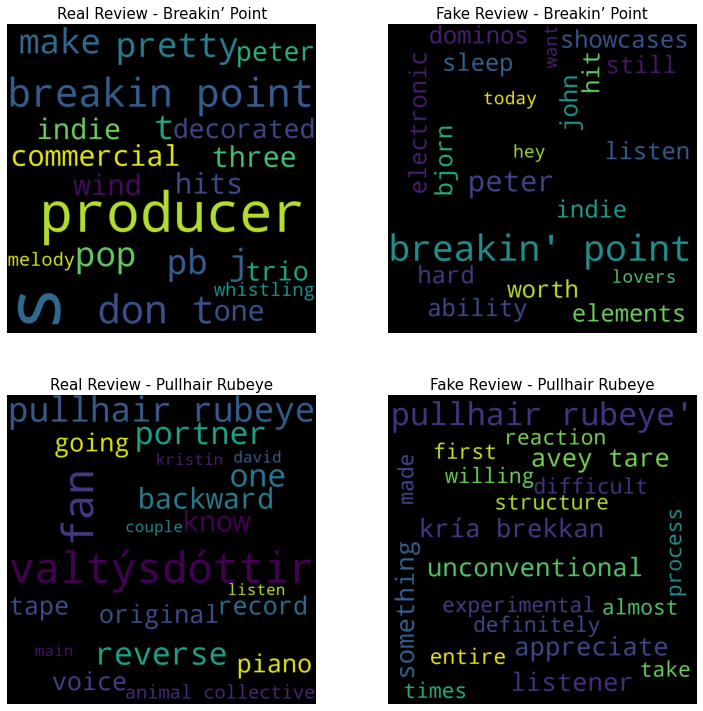

In [160]:
stopwords = set(STOPWORDS)
stopwords.update(['album','song','band','music','tracks','track','sound','songs','sounds','bands','albums'])

def add_expected_stop_words(s,stopwords):
    
    """
    Since this is a music data set we can safely remove words that include the band name, artist name and the album name
    Such words will not be adding any additional value to the word cloud visualization
    
    parameters: 
    s : pandas series object
    stopwords : list - common stop words to which this function will be adding to
    
    returns:
    stopwords: list - an updated list of stopwords that can be used for word cloud generation
    """
    
    
    #column_names = ['artist','album','genre']
    column_names = ['genre']
    
    for column_name in column_names:
        
        stopwords.update(s[column_name])
        words = parse_stop_words(s[column_name])
        stopwords.update(words)
        apos_words = [add_apos(word) for word in parse_stop_words(s[column_name])]
        stopwords.update(apos_words)
    
    return stopwords
        

def add_apos(word):
    
    """
    Adding an apostrophe to the end of word. 
    """
    
    return word+"'"

def parse_stop_words(phrase):
    
    words = phrase.split()
    words = [word.lower() for word in words]
    
    return words
                     
                     
def generate_word_cloud(stopwords,text, title):
                     
    wordcloud = WordCloud(max_font_size=200,
          width = 800, 
          height = 800,
          max_words=20,
          stopwords=stopwords,
          background_color="black"
                         ).generate(text)
    # Display the generated image:
    
    return wordcloud
                
rows = 2
cols = 2
fig, ax = plt.subplots(rows, cols, figsize=(12.5,12.5))

col = 0
for row in range(0,rows):
    s = df.iloc[row]
    #print(row, col)
    stopwords = add_expected_stop_words(s,stopwords) 
    text_review = s.review
    text_fake_review = s.fake_review
    wordcloud_real = generate_word_cloud(stopwords,text_review.lower(),'Real Review') 
    #wordcloud_fake = generate_word_cloud(stopwords,text_fake_review.lower(),'Fake Review') 
    ax[row][col].imshow(wordcloud_real)
    ax[row][col].set_title('Real Review - '+s.album,size= 15)
    ax[row][col].axis('off')
  
col +=1
for row in range(0,rows):
    s = df.iloc[row]
    #print(s)
    stopwords = add_expected_stop_words(s,stopwords) 
    text_review = s.review
    text_fake_review = s.fake_review
    #wordcloud_real = generate_word_cloud(stopwords,text_review.lower(),'Real Review') 
    wordcloud_fake = generate_word_cloud(stopwords,text_fake_review.lower(),'Fake Review') 
    ax[row][col].imshow(wordcloud_fake)
    ax[row][col].set_title('Fake Review - '+s.album, size = 15)
    ax[row][col].axis('off')
    ax[row][col].axis('off')
    

plt.show()